In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Libraries

In [2]:
!pip install researchpy

In [3]:
# libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
# read in the csv files
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_gender = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
combine = [df_train, df_test]

## Data Analysis

In [5]:
# check the shape of all the files

print(df_train.shape)
print(df_test.shape)
print(df_gender.shape)

(891, 12)
(418, 11)
(418, 2)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### Data Cleaning

In [9]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
# check for nan values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# drop the rows with nan values
df_train.dropna(subset=['Embarked'], axis=0, inplace=True)

In [14]:
df_train['Embarked'].isnull().values.any()

False

In [15]:
# drop these columns in both files
df_train.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [16]:
# check for nan values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
dtype: int64

In [17]:
df_train[df_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,6,0,3,male,NaN,0,0,Q
17,18,1,2,male,NaN,0,0,S
19,20,1,3,female,NaN,0,0,C
26,27,0,3,male,NaN,0,0,C
28,29,1,3,female,NaN,0,0,Q
...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,C
863,864,0,3,female,NaN,8,2,S
868,869,0,3,male,NaN,0,0,S
878,879,0,3,male,NaN,0,0,S


In [18]:
df_train['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
# fill the nan values with mean age
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

# fill the nan values in test file as well
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [20]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [21]:
# drop the cabin class 
#df_train[df_train['Cabin'].duplicated()].sample(10)

In [22]:
# change the age type for both train and test files

df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  889 non-null    int64 
 1   Survived     889 non-null    int64 
 2   Pclass       889 non-null    int64 
 3   Sex          889 non-null    object
 4   Age          889 non-null    int64 
 5   SibSp        889 non-null    int64 
 6   Parch        889 non-null    int64 
 7   Embarked     889 non-null    object
dtypes: int64(6), object(2)
memory usage: 62.5+ KB


In [24]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22,1,0,S
1,2,1,1,female,38,1,0,C
2,3,1,3,female,26,0,0,S
3,4,1,1,female,35,1,0,S
4,5,0,3,male,35,0,0,S
5,6,0,3,male,29,0,0,Q
6,7,0,1,male,54,0,0,S
7,8,0,3,male,2,3,1,S
8,9,1,3,female,27,0,2,S
9,10,1,2,female,14,1,0,C


### Statistical Testing

In [25]:
# check if pclass feature and survived feature are correlated
rp.summary_cat(df_train[['Pclass', 'Survived']])

,Variable,Outcome,Count,Percent
0,Pclass,3,491,55.23
1,,1,214,24.07
2,,2,184,20.70
3,Survived,0,549,61.75
4,,1,340,38.25


In [26]:
# generate crosstabulation table for calling scipy.stats.chi2_contingency
crosstab1 = pd.crosstab(df_train['Survived'], df_train['Pclass'])
crosstab1

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


Hypothesis are as follows,
* *H0* -> represents null hypothesis, i.e, there is no relationship between survival and passenger class
* *H1* -> represents alternative hypothesis, i.e, there is a relationship between survival and passenger class

In [27]:
# call the stats method
# first value reperesents x_sq test static, second value is p-value and third number is degree of freedom
# array represents the expected cell counts
stat, p, dof, expected = stats.chi2_contingency(crosstab1)
print('stat=%.3f, p=%.3f'% (stat, p))

stat=100.980, p=0.000


In [28]:
# assuming significance level of 0.005
if p > 0.005:
    print('Accepting the null hypothesis. There is no relation between survival and passenger class.')
else:
    print('Accepting alternative hypothesis. There is a relation between survival and passenger class.')

Accepting alternative hypothesis. There is a relation between survival and passenger class.


<AxesSubplot:xlabel='Age', ylabel='Sex'>

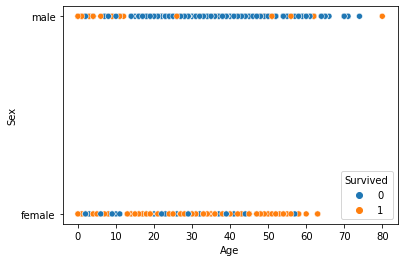

In [29]:
# plot the relation between survival and passenger class
sns.scatterplot(data=df_train, x='Age', y='Sex', hue='Survived')

In [30]:
# check the percentage of survival for each passenger class feature
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


In [31]:
# check the percentage of survival for each passenger class feature
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


In [32]:
# change the sex value to numerical value

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [33]:
df_train['Embarked'].isnull().sum()

0

In [34]:
# change the embarked value to numberical

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

Data Visualization**

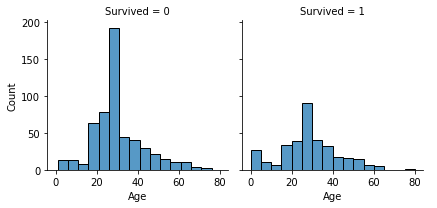

In [35]:
# plot the relation between survival and age

grid = sns.FacetGrid(df_train, col='Survived')
grid.map(sns.histplot, 'Age', bins=20, binwidth=5)
grid.add_legend()

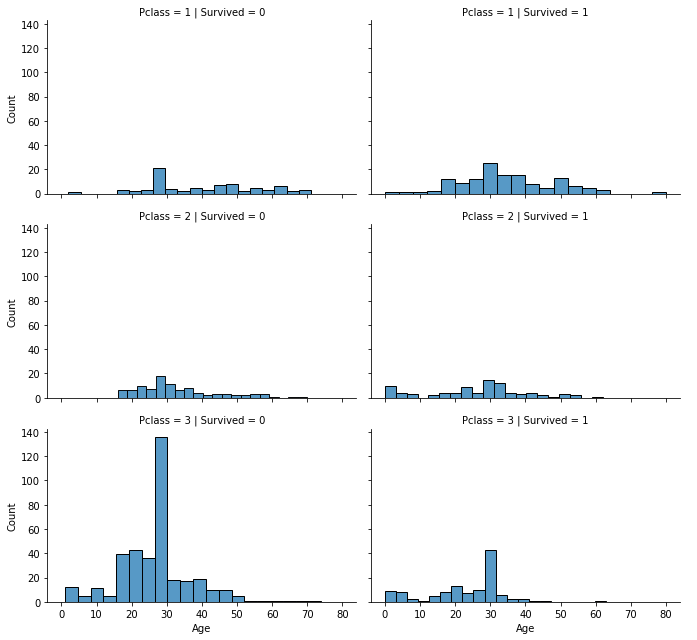

In [36]:
# plot the relation between passenger class and survival
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=3, aspect=1.6)
grid.map(sns.histplot, 'Age', bins=20)
grid.add_legend();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


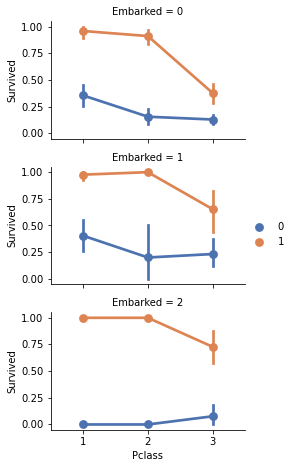

In [37]:
# plot relation between embarked and survival 
grid = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Embarked     418 non-null    int64
dtypes: int64(7)
memory usage: 23.0 KB


In [39]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [40]:
combine

[     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Embarked
 0              1         0       3    0   22      1      0         0
 1              2         1       1    1   38      1      0         1
 2              3         1       3    1   26      0      0         0
 3              4         1       1    1   35      1      0         0
 4              5         0       3    0   35      0      0         0
 ..           ...       ...     ...  ...  ...    ...    ...       ...
 886          887         0       2    0   27      0      0         0
 887          888         1       1    1   19      0      0         0
 888          889         0       3    1   29      1      2         0
 889          890         1       1    0   26      0      0         1
 890          891         0       3    0   32      0      0         2
 
 [889 rows x 8 columns],
      PassengerId  Pclass  Sex  Age  SibSp  Parch  Embarked
 0            892       3    0   34      0      0         2
 1           

## Model Prediction

In [41]:
# get x and y
X_train, X_test, y_train, y_test = train_test_split(df_train.drop("Survived", axis=1), df_train["Survived"], test_size=0.2, random_state=42)

In [42]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
708,709,1,1,22,0,0,0
240,241,3,1,29,1,0,1
382,383,3,0,32,0,0,0
792,793,3,1,29,8,2,0
683,684,3,0,14,5,2,0
...,...,...,...,...,...,...,...
107,108,3,0,29,0,0,0
271,272,3,0,25,0,0,0
862,863,1,1,48,0,0,0
436,437,3,1,21,2,2,0


In [43]:
# shape of x_train, y_train, x_test and y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((711, 7), (711,), (178, 7), (178,))

In [44]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
708,709,1,1,22,0,0,0
240,241,3,1,29,1,0,1
382,383,3,0,32,0,0,0
792,793,3,1,29,8,2,0
683,684,3,0,14,5,2,0
...,...,...,...,...,...,...,...
107,108,3,0,29,0,0,0
271,272,3,0,25,0,0,0
862,863,1,1,48,0,0,0
436,437,3,1,21,2,2,0


### Logisitic Regression

In [45]:
# initialize the model
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
model.score(X_train, y_train)

0.8016877637130801

In [48]:
accuracy_score(y_test, y_pred)

0.8033707865168539

In [49]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34,0,0,2
1,893,3,1,47,1,0,0
2,894,2,0,62,0,0,2
3,895,3,0,27,0,0,0
4,896,3,1,22,1,1,0


In [50]:
# predict on the test file
Y_pred = model.predict(df_test)